# An Introduction to Qiskit Machine Learning

Original notebook: https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/blob/main/qiskit-machine-learning/qiskit-machine-learning-demo.ipynb

Anton Dekusar<br/>
IBM Quantum, IBM Research Europe - Dublin

# Contents

* Overview of Qiskit Machine Learning
* Support Vector Machine
* Quantum Support Vector Machine
* Quantum Kernel Demo

# Overview of Qiskit Machine Learning

# Qiskit machine learning
<br>
<center>
    <img src="images/qml1.png">
</center>

# Support Vector Machine

# Classification Problem
<div style="float: left; width: 50%;">
<br>
Supervised binary classification

train set: $T = \{\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_M\}, \: \mathbf{x}_i \in \mathbb{R}^s$
    
class map: $c_{T} \rightarrow \{+1, -1\}$   

test set: $S = \{\mathbf{x}_1', \mathbf{x}_2', ..., \mathbf{x}_m'\}$
<br>    
    
A classification map for all $\mathbf{x}$ is unknown:
    
map: $c: \mathbf{x} \rightarrow \{+1, -1\}, \, \forall \mathbf{x}$    
<br>
Goal: find a class map $\widetilde{c} : T \cup \ S \rightarrow \{+1, -1\}\,$ that agrees well with the unknown map $c$ determining all true labels.

</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <img src="images/svm0.png">
    <br>
</div>

# Support Vector Machine
<div style="float: left; width: 50%;">
<br>
Linear decision function

$$
\widetilde{c}_{\text{SVM}}(\mathbf{x}) = \mathrm{sign}(\mathbf{w}^T\mathbf{x} - b)
$$

This only works for linearly separable data

Objective is to maximize the margin

$$
\min_{\mathbf{w} \in \mathbb{R}^s, \, b \in \mathbb{R}} ||\mathbf{w}||^2 \\
\text{s. t. } y_i(\mathbf{w}^T \mathbf{x}_i - b) \geq 1
$$

</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <img src="images/svm1.png">
    <br>
</div>

# Kernelized SVM
<div style="float: left; width: 50%;">
<br>
Introduce a nonlinear feature transformation

$$
\phi : \mathbb{R}^s \rightarrow \ \mathcal{V}, \text{ where} \mathcal{V} \text{ a Hilbert space} \\
\widetilde{c}_{\text{SVM}}(\mathbf{x}) = \mathrm{sign}(\langle \mathbf{w}, \phi({\mathbf{x})}\rangle_{\nu} - b)
$$

Linear in feature space, but nonlinear in the original space

Kernel trick is to rewrite the SVM problem to only explicitly depend on

$$
k(\mathbf{x}, \mathbf{x'}) = \langle\phi{(\mathbf{x})}, \phi{(\mathbf{x'})}\rangle_{\nu}
$$

not the feature vectors $\phi(\mathbf{x})$.
    
</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <img src="images/svm2.png">
    <br>
</div>

# Kernelized SVM
<div style="float: left; width: 50%;">
<br>
Original data 
$$\mathbf{x} \in \mathbb{R}^2$$

Feature map $$\phi(\mathbf{x}) = (x_1, x_2, x_1^2 + x_2^2) \in \mathbb{R}^3$$

Kernel $$k(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x}) \cdot \phi(\mathbf{x'}) = \mathbf{x} \cdot \mathbf{x'} + ||\mathbf{x}||^2 ||\mathbf{x'}||^2$$
    
</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <center>
    <img src="images/svm5.png"/>
    </center>
</div>

# Quantum Support Vector Machine

# Quantum SVM
<div style="float: left; width: 50%;">
<br>
Optimization is like in regular SVM, on a classical computer

Feature map is defined as a quantum circuit $\mathcal{E}(\mathbf{x})$:

$$
\begin{align}
\psi : \mathbb{R}^s & \rightarrow \mathcal{S}(2^q) \\
\mathbf{x} & \mapsto |\psi(\mathbf{x})\rangle \langle\psi(\mathbf{x})| \\
\end{align}
$$

Quantum Kernel as a Hilbert-Schmidt inner product:

$$
\begin{align}
k(\mathbf{x}, \mathbf{x'}) & = \mathrm{tr}[|\psi(\mathbf{x'})\rangle \langle\psi(\mathbf{x'})| \, |\psi(\mathbf{x})\rangle \langle\psi(\mathbf{x})|] \\
& = |\langle\psi(\mathbf{x'})|\psi(\mathbf{x})\rangle|^2 \\
& = |\langle0|\mathcal{E}(\mathbf{x'})^\dagger\mathcal{E}(\mathbf{x})|0\rangle|^2
\end{align}
$$

</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <center>
    <img src="images/qsvm.png"/>
    </center>
</div>

# Quantum Kernel Demo

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.utils import algorithm_globals

seed = 2022
algorithm_globals.random_seed = seed

# Classification Example

For our classification example, we will use:

* _ad hoc dataset_ as described in "Supervised learning with quantum enhanced feature spaces" (https://www.nature.com/articles/s41586-019-0980-2)
* `scikit-learn` Support Vector Machine (https://scikit-learn.org/stable/modules/svm.html) classification (`SVC`) algorithm.
* A `QSVC` wrapper from Qiskit Machine Learning.

Let's sample our train and test datasets using an utility function provided in Qiskit Machine Leanrning. We choose a number of dimensions for our dataset as `adhoc_dimensions = 2`.

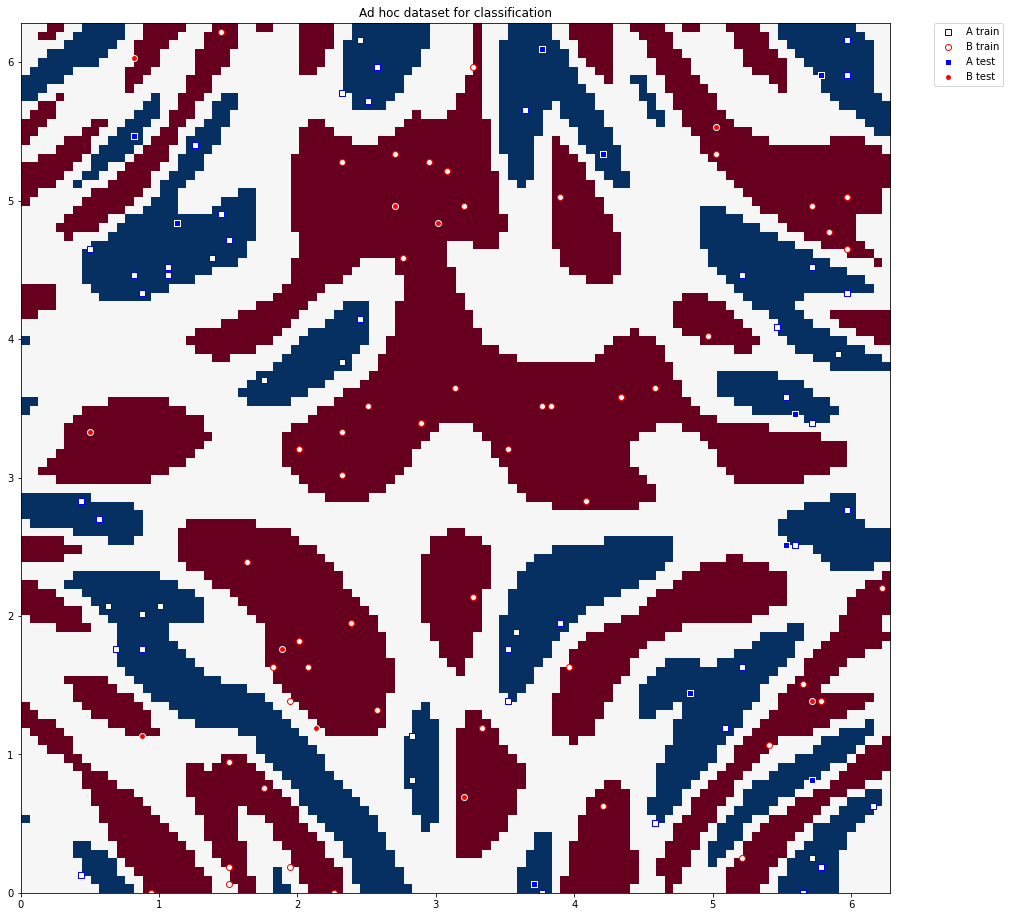

In [11]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
x_train, y_train, x_test, y_test, adhoc_total = ad_hoc_data(
    training_size=50,
    test_size=10,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

plt.figure(figsize=(16, 16))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(np.asmatrix(adhoc_total).T, interpolation='nearest',
           origin='lower', cmap='RdBu', extent=[0, 2 * np.pi, 0, 2 * np.pi])

plt.scatter(x_train[np.where(y_train[:] == 0), 0], x_train[np.where(y_train[:] == 0), 1],
            marker='s', facecolors='w', edgecolors='b', label="A train")
plt.scatter(x_train[np.where(y_train[:] == 1), 0], x_train[np.where(y_train[:] == 1), 1],
            marker='o', facecolors='w', edgecolors='r', label="B train")
plt.scatter(x_test[np.where(y_test[:] == 0), 0], x_test[np.where(y_test[:] == 0), 1],
            marker='s', facecolors='b', edgecolors='w', label="A test")
plt.scatter(x_test[np.where(y_test[:] == 1), 0], x_test[np.where(y_test[:] == 1), 1],
            marker='o', facecolors='r', edgecolors='w', label="B test")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Ad hoc dataset for classification")
plt.show()

## Classic SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7

### SVM with custom kernel

https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html

In [13]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

svc = SVC(kernel=my_kernel)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.5

# Qiskit ML

With our training and testing datasets ready, we set up the `QuantumKernel` class to calculate a kernel matrix using the `ZFeatureMap`, and the `Aer` `qasm_simulator` using 1024 shots.

In [14]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

quantum_instance = QuantumInstance(
    Aer.get_backend('qasm_simulator'),
    shots=1024,
    seed_simulator=seed,
    seed_transpiler=seed)

## ZFeatureMap

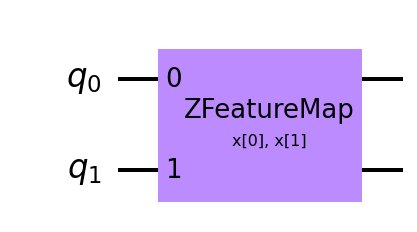

In [15]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=2)

z_kernel = QuantumKernel(feature_map=z_feature_map, quantum_instance=quantum_instance)

z_feature_map.draw(output="mpl", scale=2)

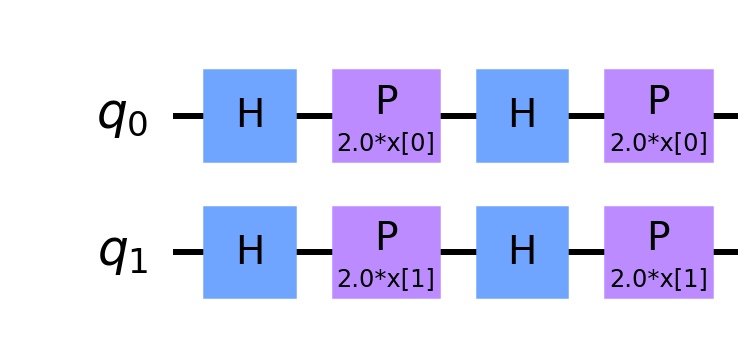

In [16]:
z_feature_map.decompose().draw(output="mpl", scale=3)

The `scikit-learn` `SVC` algorithm allows us to define a custom kernel in two ways: 

* By providing the kernel as a callable function
* By precomputing the kernel matrix. 

We can do either of these using the `QuantumKernel` class in Qiskit Machine Learning. See https://scikit-learn.org/stable/modules/svm.html#custom-kernels for more details.

In this demo we provide kernel as a callable function:

In [17]:
from sklearn.svm import SVC

svc = SVC(kernel=z_kernel.evaluate)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7

## ZZFeatureMap

> 주의: 이거 실행하니 맥북이 터질라 함

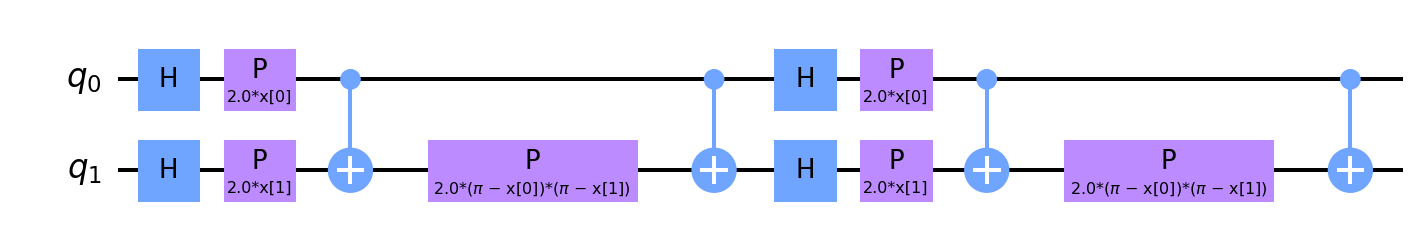

In [18]:
from qiskit.circuit.library import ZZFeatureMap

zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear')
zz_kernel = QuantumKernel(feature_map=zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output="mpl", scale=2)

In [19]:
svc = SVC(kernel=zz_kernel.evaluate)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

1.0

# QSVC
Qiskit Machine Learning also contains the `QSVC` class that extends the `scikit-learn` `SVC` class, that can be used as follows:

In [20]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC()
qsvc.quantum_kernel.quantum_instance = quantum_instance

qsvc.fit(x_train, y_train)
qsvc.score(x_test, y_test)

1.0

In [21]:
qsvc.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Additional Resources

- A blog post "Introducing Qiskit Machine Learning":<br>
https://medium.com/qiskit/introducing-qiskit-machine-learning-5f06b6597526
<br>

- Qiskit Machine Learning tutorials:<br>
https://qiskit.org/documentation/machine-learning/tutorials/
<br>

- A paper by Vojtech Havlicek et al. "Supervised learning with quantum enhanced feature spaces":<br>
https://www.nature.com/articles/s41586-019-0980-2
<br>

<center>
Thank You!
</center>